# Linear Regression
Find a regression of model that is linear on fitting the parameters

In [1]:
import numpy as np
import pylab as pl

In [2]:
# generate data set with known attributes

numSamples = 100
linearCoef = 0.5
intercept = 2.2

# random sampling
X = np.random.random(numSamples)*10.0
# add noise
e = np.random.random(numSamples) - 0.5

In [3]:
Y = linearCoef*X + intercept + e

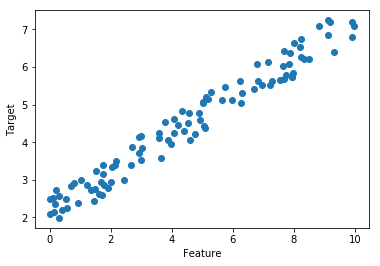

In [4]:
pl.plot(X, Y, 'o')
pl.xlabel('Feature')
pl.ylabel('Target')
pl.show()

In [5]:
from sklearn.linear_model import LinearRegression
features = X.reshape((numSamples,1))

model = LinearRegression()
model.fit( features , Y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
model.coef_

array([ 0.49924603])

In [7]:
model.intercept_

2.2243186402355213

In [8]:
# evaluate model performance
model.score(features, Y)

0.96068276255507623

Implement train-test split to make a better estimation of model performance:

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( features, Y, test_size=0.33)
model.fit(X_train, Y_train)
print("Cross-validated R2: ", model.score(X_test, Y_test) )

Cross-validated R2:  0.947950025424


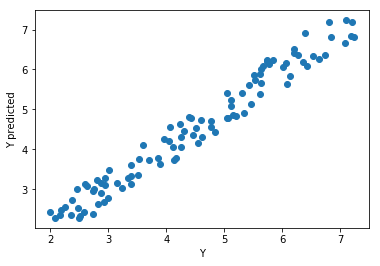

In [10]:
# plot Y against predicted Y

Y_pred = model.predict(features)
pl.plot(Y, Y_pred, 'o')
pl.xlabel('Y')
pl.ylabel('Y predicted')
pl.show()

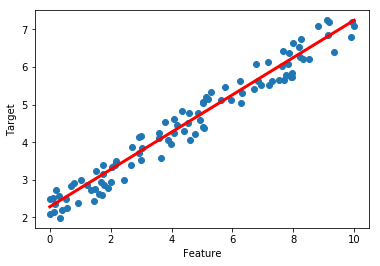

In [11]:
x_test = np.linspace(0,10,100)
y_pred = model.predict( x_test.reshape((100,1)) )
pl.plot(X, Y, 'o')
pl.plot(x_test, y_pred, 'r-', linewidth=3.)
pl.xlabel('Feature')
pl.ylabel('Target')

pl.show()

In [12]:
print("Coefficient: ", model.coef_ )
print("Intercept:   ", model.intercept_ )

Coefficient:  [ 0.49577276]
Intercept:    2.28509785238


In [13]:
print(model.score(features, Y))

0.959716847303


# Polynomial Regression
Although the model is quadratic, it is still considered a linear regression and can still be treated with the same methods.

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split( features, Y, test_size=0.33)
model.fit(X_train, Y_train)
print("Cross-validated R2: ", model.score(X_test, Y_test) )

Cross-validated R2:  0.963661120368


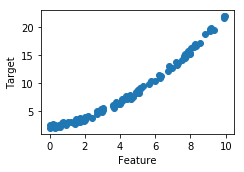

In [15]:
Y = linearCoef*X + 0.15*X**2 + intercept + e
pl.figure(figsize=(3.5,2.5))

pl.plot(X, Y, 'o')

pl.xlabel('Feature')
pl.ylabel('Target')

pl.tight_layout()
pl.savefig('LinearModel_03.png',dpi=500, transparent=True)
pl.show()

In [16]:
features = np.zeros( (numSamples,2) )
features[:,0] = X
features[:,1] = X**2
print(features.shape)

(100, 2)


In [17]:
model = LinearRegression()
model.fit( features , Y )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [18]:
x_test = np.linspace(0,10,100)
feat_test = np.zeros( (numSamples,2) )
feat_test[:,0] = x_test
feat_test[:,1] = x_test**2

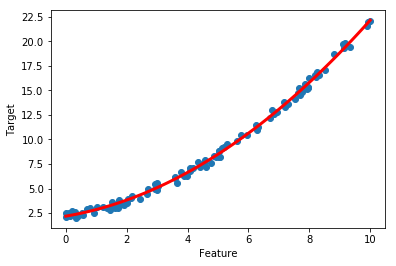

In [19]:
y_pred = model.predict( feat_test )

pl.plot(X, Y, 'o')
pl.plot(x_test, y_pred, 'r-', linewidth=3.)
pl.xlabel('Feature')
pl.ylabel('Target')

pl.show()

In [20]:
model.coef_

array([ 0.5277108 ,  0.14696822])

# Regularization and Overfitting

In [21]:
data = np.loadtxt('Regression_Exercise_dataset.dat')
print(data.shape)

(30, 2)


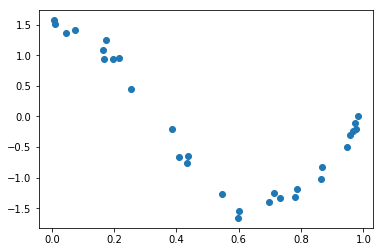

In [22]:
# Y is all rows, first column
Y = data[:, 0]
# X is all rows, second column
X = data[:, 1]
pl.plot(X, Y, 'o')
pl.show()

In [23]:
# reshape X 
X = np.reshape(X, (X.shape[0], 1))
X.shape

(30, 1)

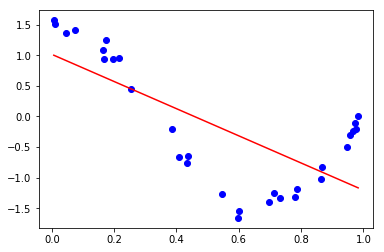

In [24]:
# find linear coeficients

coefs = []
model = LinearRegression()
model.fit(X, Y)
# add abseolute values of coefficients to vector
coefs.append(np.abs(model.coef_).mean())

pl.plot(X, Y, 'bo')
pl.plot(X, model.predict(X), 'r-')
pl.show()

The linear model is not a good fit for the data

In [25]:
# average coefficient
coefs

[2.2165337822219282]

In [26]:
features = np.c_[X, X**2]
print(features.shape)

(30, 2)


In [27]:
# add square coefficients
model = LinearRegression()
model.fit(features, Y)
# add coefs of square model to existing coefs under linear model
coefs.append( np.abs(model.coef_).mean() )

In [28]:
coefs

[2.2165337822219282, 8.9416736660470537]

In [29]:
model.predict(features)

array([ 2.13025393,  2.10258605,  1.75975706,  1.4753622 ,  0.73644551,
        0.70508413,  0.66602252,  0.48722361,  0.35912091,  0.11809241,
       -0.57871367, -0.66653078, -0.76249923, -0.76714504, -1.05148311,
       -1.11733109, -1.12040192, -1.13254492, -1.11962472, -1.10047431,
       -1.03007044, -1.0166443 , -0.81838364, -0.80782546, -0.48802219,
       -0.45297708, -0.40415161, -0.37684548, -0.3592522 , -0.3237401 ])

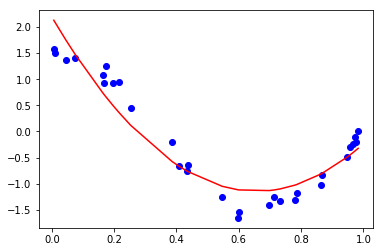

In [30]:
pl.plot(X, Y, 'bo')
pl.plot(X, model.predict(features), 'r-')
pl.savefig('linearFit2_smallerdataset.png', dpi=300)
pl.show()

In [31]:
# lets try different degrees

degree = 5
features = np.zeros((X.shape[0], degree))
for j in range(degree):
    features[:, j] = X[:, 0]**(j + 1)
print(features.shape)

(30, 5)


In [32]:
model = LinearRegression()
model.fit(features, Y)
# add coefs 5th degree to existing coefs under linear model
coefs.append( np.abs(model.coef_).mean() )
coefs

[2.2165337822219282, 8.9416736660470537, 15.340241499881021]

In [33]:
# try with 15

degree = 15
features = np.zeros((X.shape[0], degree))
for j in range(degree):
    features[:, j] = X[:, 0]**(j + 1)
model = LinearRegression()
model.fit(features, Y)
coefs.append( np.abs(model.coef_).mean() )

In [34]:
# try with 20

degree = 20
features = np.zeros((X.shape[0], degree))
for j in range(degree):
    features[:, j] = X[:, 0]**(j + 1)
model = LinearRegression()
model.fit(features, Y)
coefs.append( np.abs(model.coef_).mean() )

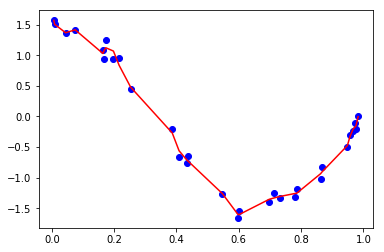

In [35]:
pl.plot(X, Y, 'bo')
pl.plot(X, model.predict(features), 'r-')
pl.show()

In [36]:
# adding more degrees causes overfitting
# compare to model coefs
model.coef_
# model coefs have a large range
# our averages are too large

array([  1.28806232e+02,  -1.76139264e+04,   8.42653963e+05,
        -2.02828709e+07,   2.89657106e+08,  -2.69802068e+09,
         1.73756799e+10,  -8.02320981e+10,   2.71181414e+11,
        -6.75524226e+11,   1.22733158e+12,  -1.55728999e+12,
         1.18504255e+12,  -8.98105383e+10,  -1.03990789e+12,
         1.43853543e+12,  -1.06227918e+12,   4.77207022e+11,
        -1.23391678e+11,   1.41897512e+10])

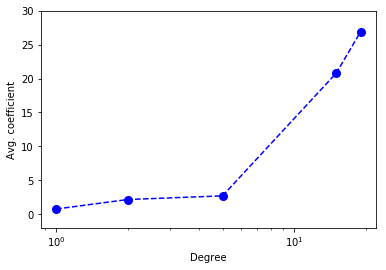

In [37]:
# plot avg coefs as a function of degree
pl.plot([1,2,5,15,19], np.log(coefs),'bo--', markersize=8)

pl.ylabel('Avg. coefficient')
pl.ylim(-2,30)
pl.xlabel('Degree')
pl.xscale('log')

pl.show()

Regularization: to prevent overfitting, we need to penalize large coefficients. 

In [38]:
from sklearn.linear_model import Ridge 
model = Ridge(alpha = 1.0)
model.fit(features, Y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

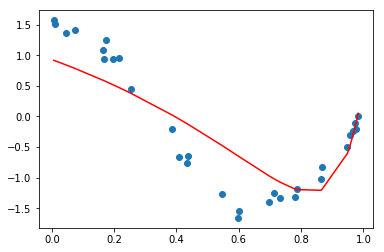

In [39]:
pl.plot(X, Y, 'o')
pl.plot(X, model.predict(features), 'r-')
pl.show()

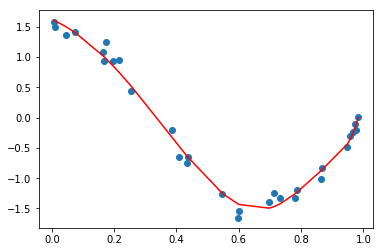

In [40]:
# try a smaller alpha
model = Ridge(alpha = 0.001)
model.fit(features, Y)

pl.plot(X, Y, 'o')
pl.plot(X, model.predict(features), 'r-')
pl.show()

In [41]:
model.coef_

array([-2.27877447, -8.77873822,  1.08374966,  5.40734633,  5.22176523,
        3.28562782,  1.15744937, -0.52907839, -1.61567797, -2.14916534,
       -2.24629487, -2.03254909, -1.61770203, -1.08866927, -0.50992571,
        0.07320884,  0.63059888,  1.14357585,  1.60181128,  2.00083933])

In [42]:
# look at train-test split
X_train, X_test, Y_train, Y_test = train_test_split( features, Y, test_size=0.33)
model.fit(X_train, Y_train)
model.score(X_test, Y_test)

0.97903444979446075

This model is a good fit!

# Unsupervised Learning through Clustering
There are no labels. This learning can discover hidden patterns in the data and use them to generate a descriptive statistics. One type of unsupervised learning is clustering. There are two main types of clustering typically used: K-Means and Hierarchical clustering. 

K-Means partitions feature space into K clusters based on means on points. This is how it works:
1. Randomly initialize clusters' centers
2. Assign points to the nearest cluster
3. Update position of clusters
4. Repeat all of the above

In [44]:
# applying K-Means to the Iris dataset
# contains measurements of 3 different species
from sklearn.datasets import load_iris
iris_data = load_iris()
print(iris_data.data.shape)

(150, 4)


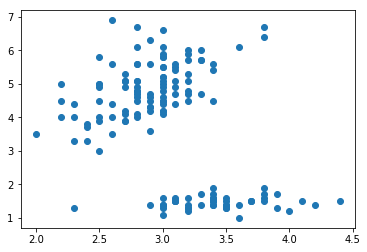

In [45]:
pl.plot(iris_data.data[:, 1], iris_data.data[:, 2], 'o')
pl.show() 

In [46]:
# running K-Means
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 3) # because we have 3 species
kmeans.fit(iris_data.data)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [47]:
clusters = kmeans.predict(iris_data.data)
print("Shape: ", clusters.shape)
print("Cluster IDs: ", clusters)

Shape:  (150,)
Cluster IDs:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 1 1 1 1 2 1 1 1 1
 1 1 2 2 1 1 1 1 2 1 2 1 2 1 1 2 2 1 1 1 1 1 2 1 1 1 1 2 1 1 1 2 1 1 1 2 1
 1 2]


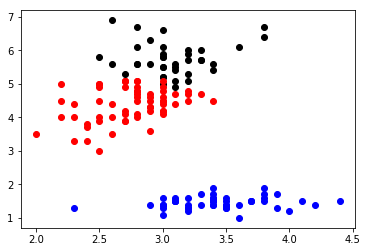

In [48]:
index0 = clusters == 0
index1 = clusters == 1
index2 = clusters == 2

pl.plot(iris_data.data[index0, 1], iris_data.data[index0, 2], 'o', color = 'b')
pl.plot(iris_data.data[index1, 1], iris_data.data[index1, 2], 'o', color = 'k')
pl.plot(iris_data.data[index2, 1], iris_data.data[index2, 2], 'o', color = 'r')
pl.show()

Because KMeans assumes known numbers of clusters, there is some freedom. There are other methods that do not assume the number of known clusters (Affinity propagation). 

# Principal Component Analysis
Can be included under unsupervised learning. It finds a set of new features that are uncorrelated among themselves. It finds covariance, the joint variability of two random variables, by constructing a covariance matrix with all possible pairs of variables and finds principal components through diagonalization. 

In [49]:
from sklearn.decomposition import PCA

X = np.random.random((200, 3))
X[:, 2] = X[:, 0]
print("Covariance matrix: ", np.cov(X.T))

Covariance matrix:  [[ 0.09222008  0.00279648  0.09222008]
 [ 0.00279648  0.08083929  0.00279648]
 [ 0.09222008  0.00279648  0.09222008]]


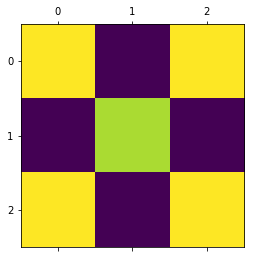

In [50]:
pl.matshow(np.cov(X.T))
pl.show()

In [51]:
pca = PCA()
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [52]:
# the highest eigenvalue explains the highest variance.
pca.explained_variance_ratio_

array([  6.95835684e-01,   3.04164316e-01,   3.50837409e-34])

In [53]:
pca.components_

array([[  7.06593628e-01,   3.80905464e-02,   7.06593628e-01],
       [  2.69340836e-02,  -9.99274292e-01,   2.69340836e-02],
       [  7.07106781e-01,   2.51648330e-18,  -7.07106781e-01]])

Applying the PCA transformation:

[[  1.84590903e-01  -3.57056651e-17  -1.45713934e-17]
 [ -3.57056651e-17   8.06885405e-02   1.58389909e-19]
 [ -1.45713934e-17   1.58389909e-19   1.29120343e-33]]


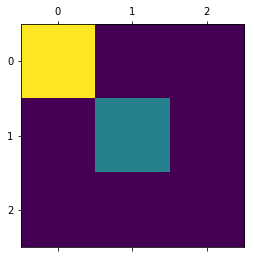

In [54]:
X_transform = pca.transform(X)
print(np.cov(X_transform.T))

pl.matshow(np.cov(X_transform.T))
pl.show()

Eigenvectors are axes that define directions where data is correlated or uncorrelated with the rest. The importance of each eigenvector is given by its corresponding eigenvalue. The eigenvector with the highest importance is one that always follows the direction of the trend. 